<a href="https://colab.research.google.com/github/Guhan2348519/lab-task/blob/main/2348519_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
data = pd.read_excel("/content/drive/MyDrive/Market_Basket_Optimisation.xlsx",header=None)
dataset = pd.read_excel("/content/drive/MyDrive/Market_Basket_Optimisation.xlsx",header=None)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
dataset.dropna(inplace=True)
basket = pd.get_dummies(dataset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


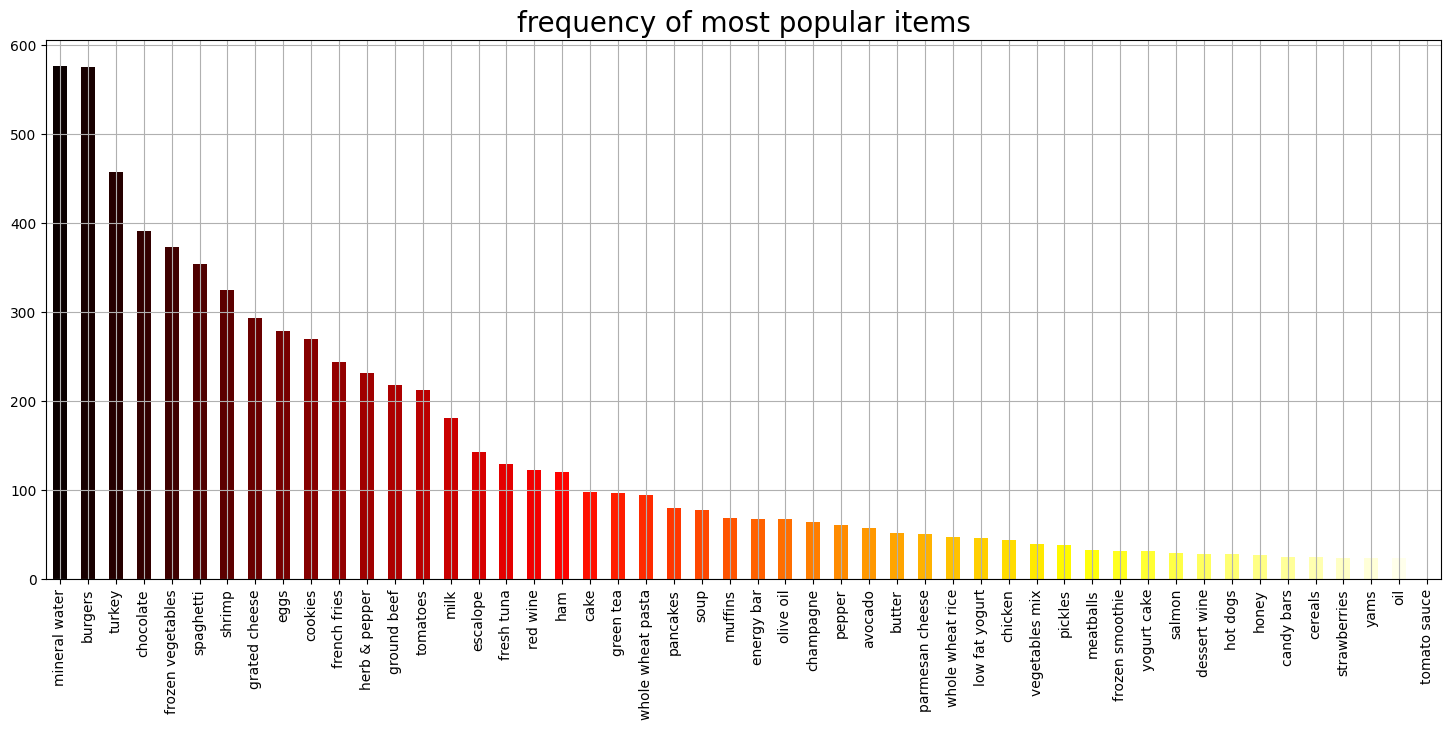

In [60]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.hot(np.linspace(0, 1, 50))
data[0].value_counts().head(50).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [62]:
dataset.dropna(inplace=True)
basket = pd.get_dummies(data)
product_popularity = basket.sum().sort_values(ascending=False)
common_itemsets = basket.sum(axis=1).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Product Popularity')

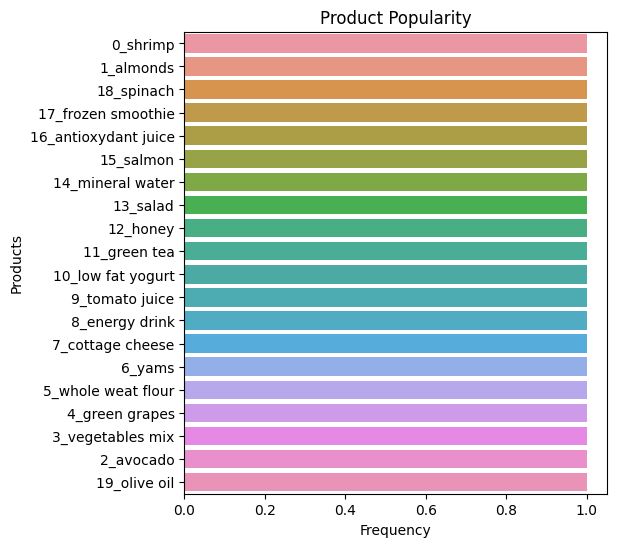

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=product_popularity.values, y=product_popularity.index)
plt.xlabel('Frequency')
plt.ylabel('Products')
plt.title('Product Popularity')



In [70]:
transaction = []
for i in range(0,7501):
  transaction.append([str(data.values[i,j]) for j in range(0,20)])
trans = np.array(transaction)
print(trans.shape)
print(trans)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)
[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]


In [19]:
encoder = TransactionEncoder()
to_array = encoder.fit_transform(trans)
df_transactions = pd.DataFrame(to_array,columns=encoder.columns_)
print(df_transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   
7500       False    False              False      False    False        False   

      bacon  barbecue sauce

In [20]:
frequent_itemsets = apriori(df_transactions,min_support= 0.01,use_colnames = True)
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                                      itemsets
0    0.020397                                     (almonds)
1    0.033329                                     (avocado)
2    0.010799                              (barbecue sauce)
3    0.014265                                   (black tea)
4    0.011465                                  (body spray)
..        ...                                           ...
510  0.011065       (ground beef, nan, milk, mineral water)
511  0.017064  (spaghetti, nan, ground beef, mineral water)
512  0.015731         (spaghetti, nan, milk, mineral water)
513  0.010265    (olive oil, spaghetti, nan, mineral water)
514  0.011465     (spaghetti, pancakes, nan, mineral water)

[515 rows x 2 columns]


In [22]:
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
print(rules)


                              antecedents           consequents  \
0                               (almonds)                 (nan)   
1                               (avocado)       (mineral water)   
2                               (avocado)                 (nan)   
3                        (barbecue sauce)                 (nan)   
4                             (black tea)                 (nan)   
..                                    ...                   ...   
739            (nan, pancakes, spaghetti)       (mineral water)   
740  (mineral water, pancakes, spaghetti)                 (nan)   
741        (nan, pancakes, mineral water)           (spaghetti)   
742                 (pancakes, spaghetti)  (nan, mineral water)   
743             (pancakes, mineral water)      (nan, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.020397            0.999867  0.020264    0.993464  0.993597   
1              0.033329            0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
frequent_itemsets = apriori(df_transactions,min_support= 0.01,use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(ground beef, nan, milk, mineral water)"
511,0.017064,"(spaghetti, nan, ground beef, mineral water)"
512,0.015731,"(spaghetti, nan, milk, mineral water)"
513,0.010265,"(olive oil, spaghetti, nan, mineral water)"


In [73]:
def recommend_products(customer_history, association_rules):
    recommendations = []

    for product in customer_history:
        relevant_rules = association_rules[association_rules['antecedents'].apply(lambda x: product in x)]
        relevant_rules = relevant_rules.sort_values(by='confidence', ascending=False)
        recommended_products = relevant_rules['consequents'].tolist()

        for products in recommended_products:
            for p in products:
                if p not in customer_history:
                    recommendations.append(p)

    return recommendations


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
customer_history = ['Product A', 'Product B']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
def calculate_cross_selling_metrics(before_strategy_sales, after_strategy_sales):
    before_strategy_revenue = sum(before_strategy_sales)
    after_strategy_revenue = sum(after_strategy_sales)

    conversion_rate_before = len(before_strategy_sales) / len(customer_history)
    conversion_rate_after = len(after_strategy_sales) / len(customer_history)

    revenue_increase = after_strategy_revenue - before_strategy_revenue

    return {
        'Conversion Rate Before': conversion_rate_before,
        'Conversion Rate After': conversion_rate_after,
        'Revenue Increase': revenue_increase
    }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
before_strategy_sales = [100, 150, 120, 80]
after_strategy_sales = [120, 160, 130, 90]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
cross_selling_metrics = calculate_cross_selling_metrics(before_strategy_sales, after_strategy_sales)
print("Cross-Selling Performance Metrics:", cross_selling_metrics)

Cross-Selling Performance Metrics: {'Conversion Rate Before': 2.0, 'Conversion Rate After': 2.0, 'Revenue Increase': 50}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
